In [3]:
# ============================================
# IMPORTANDO BIBLIOTECAS
# ============================================

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [4]:
# ============================================
# IMPORTANDO ARQUIVOS
# ============================================

# nome do arquivo
dir_treino = 'Modulo_Fase_TREINO.txt' 
dir_teste ='Modulo_Fase_TESTE.txt'

# Informa o cabeçalho das colunas
colunas = ['ID_TRILHA', 'G_SAÚDE', 'G_ISOLAMENTO', 'G_TRILHA', 'N_ISOLAMENTO', 'N_TRILHA', 'M_225886', 'M_246180', 'M_268298', 'M_292402', 'M_318672', 'M_347302', 'M_378504', 'M_412509', 'M_449569', 'M_489959', 'M_533978', 'M_581951', 'M_634235', 'M_691215', 'M_753315', 'M_820994', 'M_894753', 'M_975139', 'M_1062747', 'M_1158226', 'M_1262283', 'M_1375688', 'M_1499282', 'M_1633980', 'M_1780779', 'M_1940767', 'M_2115128', 'M_2305154', 'M_2512253', 'M_2737957', 'M_2983939', 'M_3252021', 'M_3544187', 'M_3862602', 'M_4209624', 'M_4587823', 'F_225886', 'F_246180', 'F_268298', 'F_292402', 'F_318672', 'F_347302', 'F_378504', 'F_412509', 'F_449569', 'F_489959', 'F_533978', 'F_581951', 'F_634235', 'F_691215', 'F_753315', 'F_820994', 'F_894753', 'F_975139', 'F_1062747', 'F_1158226', 'F_1262283', 'F_1375688', 'F_1499282', 'F_1633980', 'F_1780779', 'F_1940767', 'F_2115128', 'F_2305154', 'F_2512253', 'F_2737957', 'F_2983939', 'F_3252021', 'F_3544187', 'F_3862602', 'F_4209624', 'F_4587823']
# Carrega uma base de dados - TREINO
dataset_treino = pd.read_csv(dir_treino, names=colunas, skiprows=0, delimiter=';') 

#Carrega uma base de dados - TESTE
dataset_teste = pd.read_csv(dir_teste, names=colunas, skiprows=0, delimiter=';')  


# DADOS GERAIS
dataset_FULL = pd.concat([dataset_treino, dataset_teste], axis=0)

In [5]:
dataset_FULL

,ID_TRILHA,G_SAÚDE,G_ISOLAMENTO,G_TRILHA,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,...,F_2115128,F_2305154,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823
0,I1_C0_T1,1.0,1.0,1.0,0.5,0.25,160660.0,147742.0,135860.0,124897.0,...,-75.96,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51
1,I1_C0_T11,1.0,1.0,11.0,0.5,2.75,125706.0,115581.0,106306.0,97732.0,...,-75.91,-74.83,-73.66,-72.37,-70.85,-69.17,-67.36,-65.34,-63.11,-60.60
2,I1_C0_T12,1.0,1.0,12.0,0.5,3.00,123545.0,113604.0,104458.0,96073.0,...,-75.94,-74.87,-73.69,-72.40,-70.88,-69.21,-67.37,-65.37,-63.14,-60.67
3,I1_C0_T2,1.0,1.0,2.0,0.5,0.50,152581.0,140354.0,129049.0,118616.0,...,-76.05,-74.96,-73.79,-72.49,-70.95,-69.24,-67.40,-65.36,-63.12,-60.60
4,I1_C0_T3,1.0,1.0,3.0,0.5,0.75,146452.0,134718.0,123921.0,113932.0,...,-75.94,-74.86,-73.68,-72.38,-70.83,-69.15,-67.30,-65.26,-63.01,-60.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,I3_C4_T1,0.0,3.0,1.0,1.5,0.25,187999.0,172845.0,158948.0,146147.0,...,-77.41,-76.46,-75.46,-74.33,-72.95,-71.52,-69.83,-68.04,-66.24,-64.60
31,I3_C4_T3,0.0,3.0,3.0,1.5,0.75,174040.0,160035.0,147157.0,135301.0,...,-77.31,-76.36,-75.35,-74.21,-72.82,-71.39,-69.73,-67.90,-66.04,-64.38
32,I3_C4_T7,0.0,3.0,7.0,1.5,1.75,151682.0,139450.0,128230.0,117895.0,...,-77.31,-76.36,-75.33,-74.17,-72.80,-71.36,-69.72,-67.90,-65.99,-64.30
33,I4_C0_T10,1.0,4.0,10.0,2.0,2.50,160626.0,147502.0,135850.0,125048.0,...,-76.09,-75.03,-73.90,-72.64,-71.14,-69.46,-67.67,-65.69,-63.49,-61.05


In [8]:
labels = dataset_FULL.iloc[:,0:2]

dt_N_M =  pd.concat([labels,dataset_FULL.iloc[:,4:42]] , axis=1)
dt_N_F =  pd.concat([labels, pd.concat([dataset_FULL.iloc[:,4:6], dataset_FULL.iloc[:,42:79]], axis=1) ] , axis=1)
dt_N_MF = pd.concat([labels, dataset_FULL.iloc[:,4:79]] , axis=1)


In [9]:
# Instanciar o objeto PCA com o número de componentes desejado
pca_M = PCA(n_components=10)
pca_F = PCA(n_components=10)
pca_MF = PCA(n_components=10)

# Ajustar o modelo aos dados
pca_M.fit(dt_N_M.iloc[:,2:])
pca_F.fit(dt_N_F.iloc[:,2:])
pca_MF.fit(dt_N_MF.iloc[:,2:])


PCA(n_components=10)

In [10]:
# Apresenta o valor da representividade de variância significativa 
#e cada COMPONENTE PRINCIPAL em relação aos dados

print('Valor de representatividade - PCA')
print('=====')
print('Módulo')
print(pca_M.explained_variance_ratio_)
print('=====')
print('Fase')
print(pca_F.explained_variance_ratio_)
print('=====')
print('Módulo e Fase')
print(pca_MF.explained_variance_ratio_)
print('=====')
#np.round(pca.explained_variance_ratio_,1)

Valor de representatividade - PCA
=====
Módulo
[9.99868629e-01 1.12354049e-04 1.43711855e-05 1.73868550e-06
 1.55440254e-06 3.35574683e-07 2.23176797e-07 1.89028180e-07
 1.21761873e-07 8.35231879e-08]
=====
Fase
[8.59327935e-01 7.39649276e-02 4.74621990e-02 1.69417117e-02
 1.60525167e-03 3.18477586e-04 9.89343006e-05 7.22990092e-05
 2.79222152e-05 2.42251970e-05]
=====
Módulo e Fase
[9.99868625e-01 1.12354373e-04 1.43729313e-05 1.73871525e-06
 1.55440358e-06 3.35621059e-07 2.23180901e-07 1.89116441e-07
 1.21785079e-07 8.35233824e-08]
=====


In [11]:
# Apresenta o valor - ACUMULADO- da representividade de 
# variância significativa E cada COMPONENTE PRINCIPAL em 
#relação aos dados

print('Valor de representatividade ACUMULADO - PCA')
print('=====')
print('Módulo')
print(pca_M.explained_variance_ratio_.cumsum())
print('=====')
print('Fase')
print(pca_F.explained_variance_ratio_.cumsum())
print('=====')
print('Módulo e Fase')
print(pca_MF.explained_variance_ratio_.cumsum())
print('=====')



Valor de representatividade ACUMULADO - PCA
=====
Módulo
[0.99986863 0.99998098 0.99999535 0.99999709 0.99999865 0.99999898
 0.99999921 0.99999939 0.99999952 0.9999996 ]
=====
Fase
[0.85932793 0.93329286 0.98075506 0.99769677 0.99930202 0.9996205
 0.99971944 0.99979174 0.99981966 0.99984388]
=====
Módulo e Fase
[0.99986863 0.99998098 0.99999535 0.99999709 0.99999865 0.99999898
 0.9999992  0.99999939 0.99999952 0.9999996 ]
=====


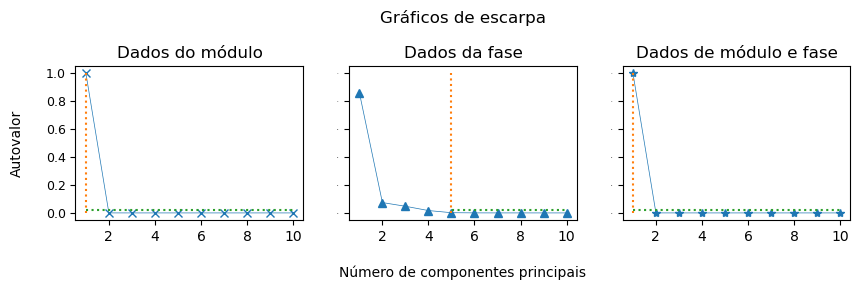

In [12]:
aux = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10,2))

plt.rcParams['ytick.labelsize'] = 9
#plot 1:
plt.subplot(1, 3, 1)
plt.title('Dados do módulo')
plt.plot(aux,list(pca_M.explained_variance_ratio_), marker= 'x', linewidth=0.5)
plt.plot([1,1],[1,0], ':')
plt.plot([1.02,10],[0.02,0.02], ':')
plt.ylabel('Autovalor\n')

plt.rcParams['ytick.labelsize'] = 0
#plot 2:
plt.subplot(1, 3, 2)
plt.title('Gráficos de escarpa\n\nDados da fase')
plt.plot(aux,list(pca_F.explained_variance_ratio_), marker= '^', linewidth=0.5)
plt.plot([5,5],[0,1], ':')
plt.plot([5.02,10],[0.02,0.02], ':')
plt.xlabel('\nNúmero de componentes principais')

plt.rcParams['ytick.labelsize'] = 0
#plot 3:
plt.subplot(1, 3, 3)
plt.title('Dados de módulo e fase')
plt.plot(aux,list(pca_MF.explained_variance_ratio_), marker= '*', linewidth=0.5)
plt.plot([1,1],[1,0], ':')
plt.plot([1.02,10],[0.02,0.02], ':')

plt.show()

In [13]:
#============
# Modulo e Fase
#============
PCA1_MF = pca_MF.transform(dt_N_MF.iloc[:,2:])[:,0]
PCA2_MF = pca_MF.transform(dt_N_MF.iloc[:,2:])[:,1]



PCA1_MF_Padronizado = ((PCA1_MF-PCA1_MF.min())/(PCA1_MF.max()-PCA1_MF.min()))
PCA2_MF_Padronizado = ((PCA2_MF-PCA2_MF.min())/(PCA2_MF.max()-PCA2_MF.min()))


In [14]:
dataset_FULL['PCA1'] = PCA1_MF_Padronizado
dataset_FULL['PCA2'] = PCA2_MF_Padronizado

In [15]:
dataset_FULL

,ID_TRILHA,G_SAÚDE,G_ISOLAMENTO,G_TRILHA,N_ISOLAMENTO,N_TRILHA,M_225886,M_246180,M_268298,M_292402,...,F_2512253,F_2737957,F_2983939,F_3252021,F_3544187,F_3862602,F_4209624,F_4587823,PCA1,PCA2
0,I1_C0_T1,1.0,1.0,1.0,0.5,0.25,160660.0,147742.0,135860.0,124897.0,...,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51,0.301353,0.111639
1,I1_C0_T11,1.0,1.0,11.0,0.5,2.75,125706.0,115581.0,106306.0,97732.0,...,-73.66,-72.37,-70.85,-69.17,-67.36,-65.34,-63.11,-60.60,0.017795,0.244565
2,I1_C0_T12,1.0,1.0,12.0,0.5,3.00,123545.0,113604.0,104458.0,96073.0,...,-73.69,-72.40,-70.88,-69.21,-67.37,-65.37,-63.14,-60.67,0.000000,0.225004
3,I1_C0_T2,1.0,1.0,2.0,0.5,0.50,152581.0,140354.0,129049.0,118616.0,...,-73.79,-72.49,-70.95,-69.24,-67.40,-65.36,-63.12,-60.60,0.235567,0.082926
4,I1_C0_T3,1.0,1.0,3.0,0.5,0.75,146452.0,134718.0,123921.0,113932.0,...,-73.68,-72.38,-70.83,-69.15,-67.30,-65.26,-63.01,-60.49,0.186523,0.158406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,I3_C4_T1,0.0,3.0,1.0,1.5,0.25,187999.0,172845.0,158948.0,146147.0,...,-75.46,-74.33,-72.95,-71.52,-69.83,-68.04,-66.24,-64.60,0.524247,0.212554
31,I3_C4_T3,0.0,3.0,3.0,1.5,0.75,174040.0,160035.0,147157.0,135301.0,...,-75.35,-74.21,-72.82,-71.39,-69.73,-67.90,-66.04,-64.38,0.410763,0.229916
32,I3_C4_T7,0.0,3.0,7.0,1.5,1.75,151682.0,139450.0,128230.0,117895.0,...,-75.33,-74.17,-72.80,-71.36,-69.72,-67.90,-65.99,-64.30,0.228362,0.206480
33,I4_C0_T10,1.0,4.0,10.0,2.0,2.50,160626.0,147502.0,135850.0,125048.0,...,-73.90,-72.64,-71.14,-69.46,-67.67,-65.69,-63.49,-61.05,0.302636,0.292527


In [16]:
X1 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==1)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,78]
Y1 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==1)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,79]

X2 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==2)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,78]
Y2 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==2)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,79]

X3 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,78]
Y3 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,79]

X4 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==4)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,78]
Y4 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==4)  & ((dataset_FULL['G_TRILHA']==3) |(dataset_FULL['G_TRILHA']==7| (dataset_FULL['G_TRILHA']==11)))].iloc[:,79]

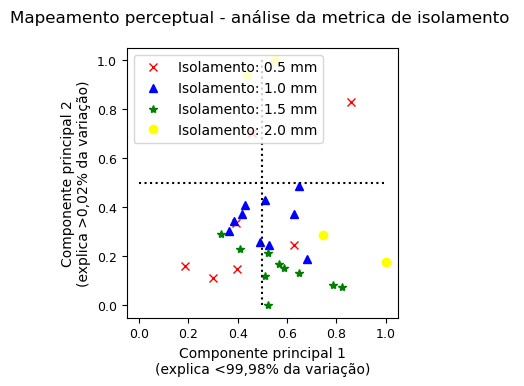

In [17]:
fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.plot(X1,Y1,'x', label='Isolamento: 0.5 mm', color='red')
plt.plot(X2,Y2,'^', label='Isolamento: 1.0 mm',color='blue')
plt.plot(X3,Y3,'*', label='Isolamento: 1.5 mm',color='green')
plt.plot(X4,Y4,'o', label='Isolamento: 2.0 mm',color='Yellow')

plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')


plt.title('Mapeamento perceptual - análise da metrica de isolamento \n')
plt.xlabel('Componente principal 1\n(explica <99,98% da variação)')
plt.ylabel('Componente principal 2\n(explica >0,02% da variação)')

plt.grid(False)
plt.legend(loc=2)
plt.rc('legend', fontsize = 8) 

plt.show()
plt.close()

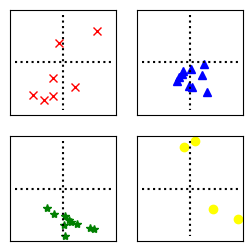

In [18]:
# ISOLAMENTO: 1,2,3,4
# TRILHAS: 3, 7, 11

# plot
## Uma forma de visualizar a relação entre as componentes e as variáveis

fig = plt.figure(figsize=(3,3))

plt.subplot(2, 2, 1)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X1,Y1,'x', label='Isolamento: 0.5 mm', color='red')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 2)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X2,Y2,'^', label='Isolamento: 1.0 mm',color='blue')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 3)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X3,Y3,'*', label='Isolamento: 1.5 mm',color='green')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')

plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 4)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X4,Y4,'o', label='Isolamento: 2.0 mm',color='Yellow')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])



plt.grid(False)

plt.show()
plt.close()

In [19]:
X1 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==1) )].iloc[:,78]
Y1 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==1) )].iloc[:,79]

X2 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==3) )].iloc[:,78]
Y2 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==3) )].iloc[:,79]

X3 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==7) )].iloc[:,78]
Y3 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==7) )].iloc[:,79]

X4 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==11) )].iloc[:,78]
Y4 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==11) )].iloc[:,79]

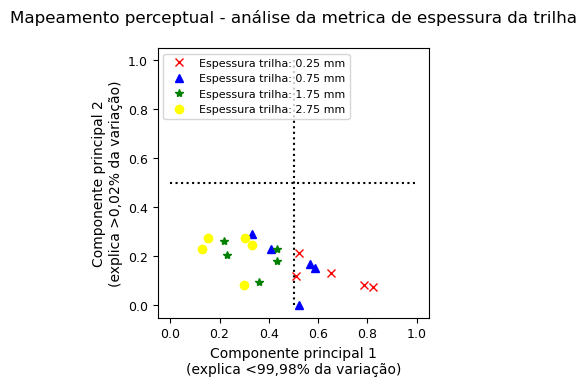

In [20]:
# ISOLAMENTO: 3
# TRILHAS: 1, 3, 7, 11

fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.plot(X1,Y1,'x', label='Espessura trilha: 0.25 mm', color='red')
plt.plot(X2,Y2,'^', label='Espessura trilha: 0.75 mm',color='blue')
plt.plot(X3,Y3,'*', label='Espessura trilha: 1.75 mm',color='green')
plt.plot(X4,Y4,'o', label='Espessura trilha: 2.75 mm',color='Yellow')

plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')


plt.title('Mapeamento perceptual - análise da metrica de espessura da trilha\n')
plt.xlabel('Componente principal 1\n(explica <99,98% da variação)')
plt.ylabel('Componente principal 2\n(explica >0,02% da variação)')

plt.grid(False)
plt.legend(loc=2)
plt.rc('legend', fontsize = 8) 

plt.show()
plt.close()

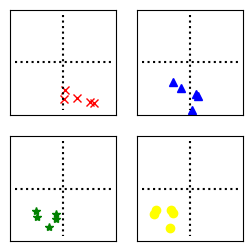

In [21]:
# ISOLAMENTO: 1,2,3,4
# TRILHAS: 3, 7, 11

# plot
## Uma forma de visualizar a relação entre as componentes e as variáveis

fig = plt.figure(figsize=(3,3))

plt.subplot(2, 2, 1)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X1,Y1,'x', label='Espessura trilha: 0.25 mm', color='red')

plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 2)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X2,Y2,'^', label='Espessura trilha: 0.75 mm',color='blue')

plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 3)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X3,Y3,'*', label='Espessura trilha: 1.75 mm',color='green')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])


plt.subplot(2, 2, 4)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X4,Y4,'o', label='Espessura trilha: 2.75 mm',color='Yellow')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])


plt.grid(False)

plt.show()
plt.close()

In [22]:
X1 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==1) )].iloc[:,78]
Y1 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==1) )].iloc[:,79]

X2 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==3) )].iloc[:,78]
Y2 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==3) )].iloc[:,79]

X3 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==7) )].iloc[:,78]
Y3 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==7) )].iloc[:,79]

X4 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==11) )].iloc[:,78]
Y4 = dataset_FULL[(dataset_FULL['G_ISOLAMENTO']==3)  & ((dataset_FULL['G_TRILHA']==11) )].iloc[:,79]

X5 = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==1)|
                   (dataset_FULL['G_TRILHA']==3)|
                   (dataset_FULL['G_TRILHA']==7)|
                   (dataset_FULL['G_TRILHA']==11)
                  )
                 ].iloc[:,78]



Y5 = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==1)|
                   (dataset_FULL['G_TRILHA']==3)|
                   (dataset_FULL['G_TRILHA']==7)|
                   (dataset_FULL['G_TRILHA']==11)
                  )
                 ].iloc[:,79]

#############

X5_a = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==1)
                  )
                 ].iloc[:,78]
Y5_a = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==1)
                  )
                 ].iloc[:,79]
#############

X5_b = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==3)
                  )
                 ].iloc[:,78]
Y5_b = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==3)
                  )
                 ].iloc[:,79]
#############

X5_c = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==7)
                  )
                 ].iloc[:,78]
Y5_c = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==7)
                  )
                 ].iloc[:,79]

#############

X5_d = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==11)
                  )
                 ].iloc[:,78]
Y5_d = dataset_FULL[(dataset_FULL['G_SAÚDE']==1)  &
                  ((dataset_FULL['G_ISOLAMENTO']==3) ) &
                  ((dataset_FULL['G_TRILHA']==11)
                  )
                 ].iloc[:,79]

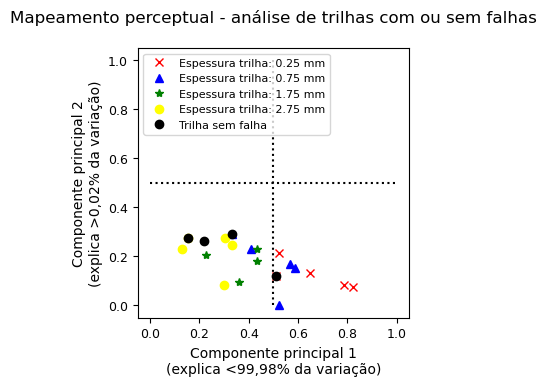

In [23]:
# ISOLAMENTO: 3
# TRILHAS: 1, 3, 7, 11

fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.plot(X1,Y1,'x', label='Espessura trilha: 0.25 mm', color='red')
plt.plot(X2,Y2,'^', label='Espessura trilha: 0.75 mm',color='blue')
plt.plot(X3,Y3,'*', label='Espessura trilha: 1.75 mm',color='green')
plt.plot(X4,Y4,'o', label='Espessura trilha: 2.75 mm',color='Yellow')
plt.plot(X5,Y5,'o', label='Trilha sem falha',color='black')

plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')


plt.title('Mapeamento perceptual - análise de trilhas com ou sem falhas\n')
plt.xlabel('Componente principal 1\n(explica <99,98% da variação)')
plt.ylabel('Componente principal 2\n(explica >0,02% da variação)')

plt.grid(False)
plt.legend(loc=2)
plt.rc('legend', fontsize = 8) 

plt.show()
plt.close()

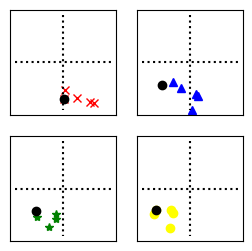

In [24]:
# ISOLAMENTO: 1,2,3,4
# TRILHAS: 3, 7, 11

# plot
## Uma forma de visualizar a relação entre as componentes e as variáveis

fig = plt.figure(figsize=(3,3))

plt.subplot(2, 2, 1)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X1,Y1,'x', label='Espessura trilha: 0.25 mm', color='red')
plt.plot(X5_a,Y5_a,'o', label='Trilha sem falha',color='black')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 2)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X2,Y2,'^', label='Espessura trilha: 0.75 mm',color='blue')
plt.plot(X5_c,Y5_c,'o', label='Trilha sem falha',color='black')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])

plt.subplot(2, 2, 3)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X3,Y3,'*', label='Espessura trilha: 1.75 mm',color='green')
plt.plot(X5_c,Y5_c,'o', label='Trilha sem falha',color='black')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])


plt.subplot(2, 2, 4)
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0
plt.plot(X4,Y4,'o', label='Espessura trilha: 2.75 mm',color='Yellow')
plt.plot(X5_d,Y5_d,'o', label='Trilha sem falha',color='black')
plt.plot([0.5,0.5],[1,0], ':',color='black')
plt.plot([0,1],[0.5,0.5], ':',color='black')
plt.yticks([])
plt.xticks([])


plt.grid(False)

plt.show()
plt.close()